In this Notebook we visualize the data in the Ml-20 Movies Dataset. We assume you have imported this dataset into a PostgreSQL Database

The Dataset: https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset

In [ ]:
# To interact with a Postgres database in Python, we use a library called
# Psycopg2. It can be installed with the command below. Comment it out if you already have the library installed.
# We also use an ORM (Object Relational Mapper) called SQLAlchemy. An ORM basically just turns SQL into Python Objects
!pip install psycopg2 sqlalchemy

# Install other depedencies
!pip install matplotlib pandas

#### Documentation
To learn more about Objects in Python and ORMs, here are a few resources:

*Object Oriented Programming* :

https://realpython.com/python3-object-oriented-programming/

https://www.youtube.com/watch?v=rLyYb7BFgQI

*Object Relational Mapping* :

https://www.freecodecamp.org/news/what-is-an-orm-the-meaning-of-object-relational-mapping-database-tools/


In [1]:
# Define the Variables Required for connecting to the database
import os

user = os.environ.get("PG_USER", "takach")
pw = os.environ.get("PG_PASS", "pwd_2025")
db = os.environ.get("PG_DB", "movie_reviews")
host = os.environ.get("PG_HOST", "localhost")
port = os.environ.get("PG_PORT", 5432)

#### Pro Tip
Environment variables can be used to store sensitive information like database passwords.

https://www.datacamp.com/tutorial/python-environment-variables

In [2]:
# Connect to the Database Using SQL Alchemy
# https://docs.sqlalchemy.org/en/20/core/engines.html
from sqlalchemy import create_engine
from urllib.parse import quote_plus
uri = f"postgresql+psycopg2://{quote_plus(user)}:{quote_plus(pw)}@{host}:{port}/{db}"
alchemyEngine = create_engine(uri)
dbConnection = alchemyEngine.connect()
dbConnection.autocommit = True

ModuleNotFoundError: No module named 'sqlalchemy'

#### Documentation
Below we use Aggregate functions to explore the movie dataset

More about Aggregate functions:

https://www.w3schools.com/sql/sql_aggregate_functions.asp

<Axes: xlabel='title_length'>

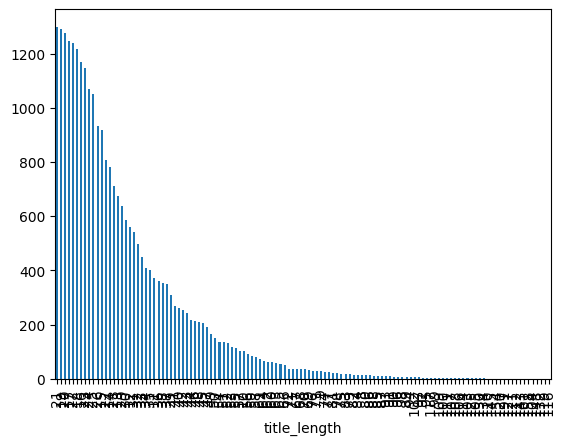

In [40]:
# We can use pandas to read from the database
# Pandas provides a function for reading SQL Data;
import pandas as pd

# A Query for getting all movie titles and their lengths
QUERY = 'SELECT title, genre FROM movies;'
df = pd.read_sql(QUERY, dbConnection)
df[]
df['title_length'].value_counts().plot.bar() # Pandas provides shortcuts for interacting with matplotlib

#### Documentation
Pandas Basics: https://www.datacamp.com/tutorial/pandas

Reading From a PostgreSQL Database with Pandas: https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html

In [ ]:
dbConnection.close(); # Close the Database Connection

In [ ]:
# Open a cursor to perform database operations
cur = conn.cursor()

# Execute a command
cur.execute("""CREATE TABLE datacamp_courses(
            course_id SERIAL PRIMARY KEY,
            course_name VARCHAR (50) UNIQUE NOT NULL,
            course_instructor VARCHAR (100) NOT NULL,
            topic VARCHAR (20) NOT NULL);
            """)
# Make the changes to the database persistent
conn.commit()
# Close cursor and communication with the database
cur.close()
conn.close()

-- Create a word cloud from these
SELECT title from movies where title like '%genious%';

-- Functions in SQL - Aggregation
SELECT count(title) from movies where title like '%genious%';



-- Matplotlib


-- Numpy

#### Documentation

Above we use the cursor class in Pyscopg2 to interact with our movies database. Here's a detailed documentation of the cursor class: https://www.geeksforgeeks.org/python-psycopg-cursor-class/

In [3]:
import pandas as pd
file_path = "D:/Desktop/content-recommender/movie-data-visualization-project/dataset/movie.csv"
df = pd.read_csv(file_path)
df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)
